   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)

 Visualize Data Patterns Before Modeling


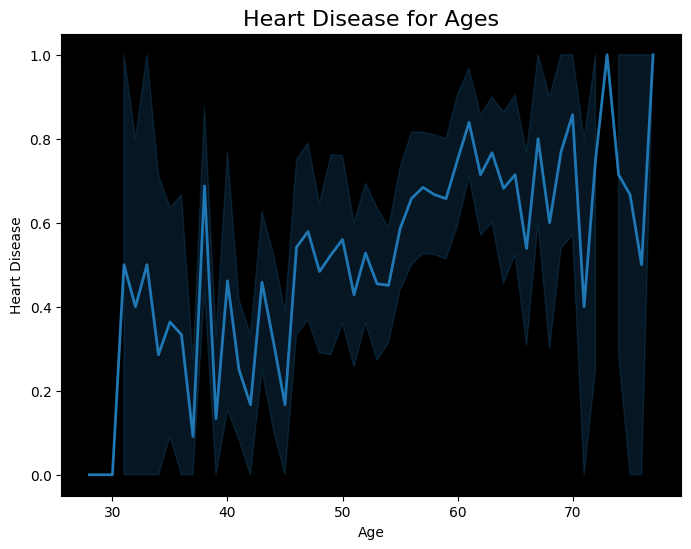

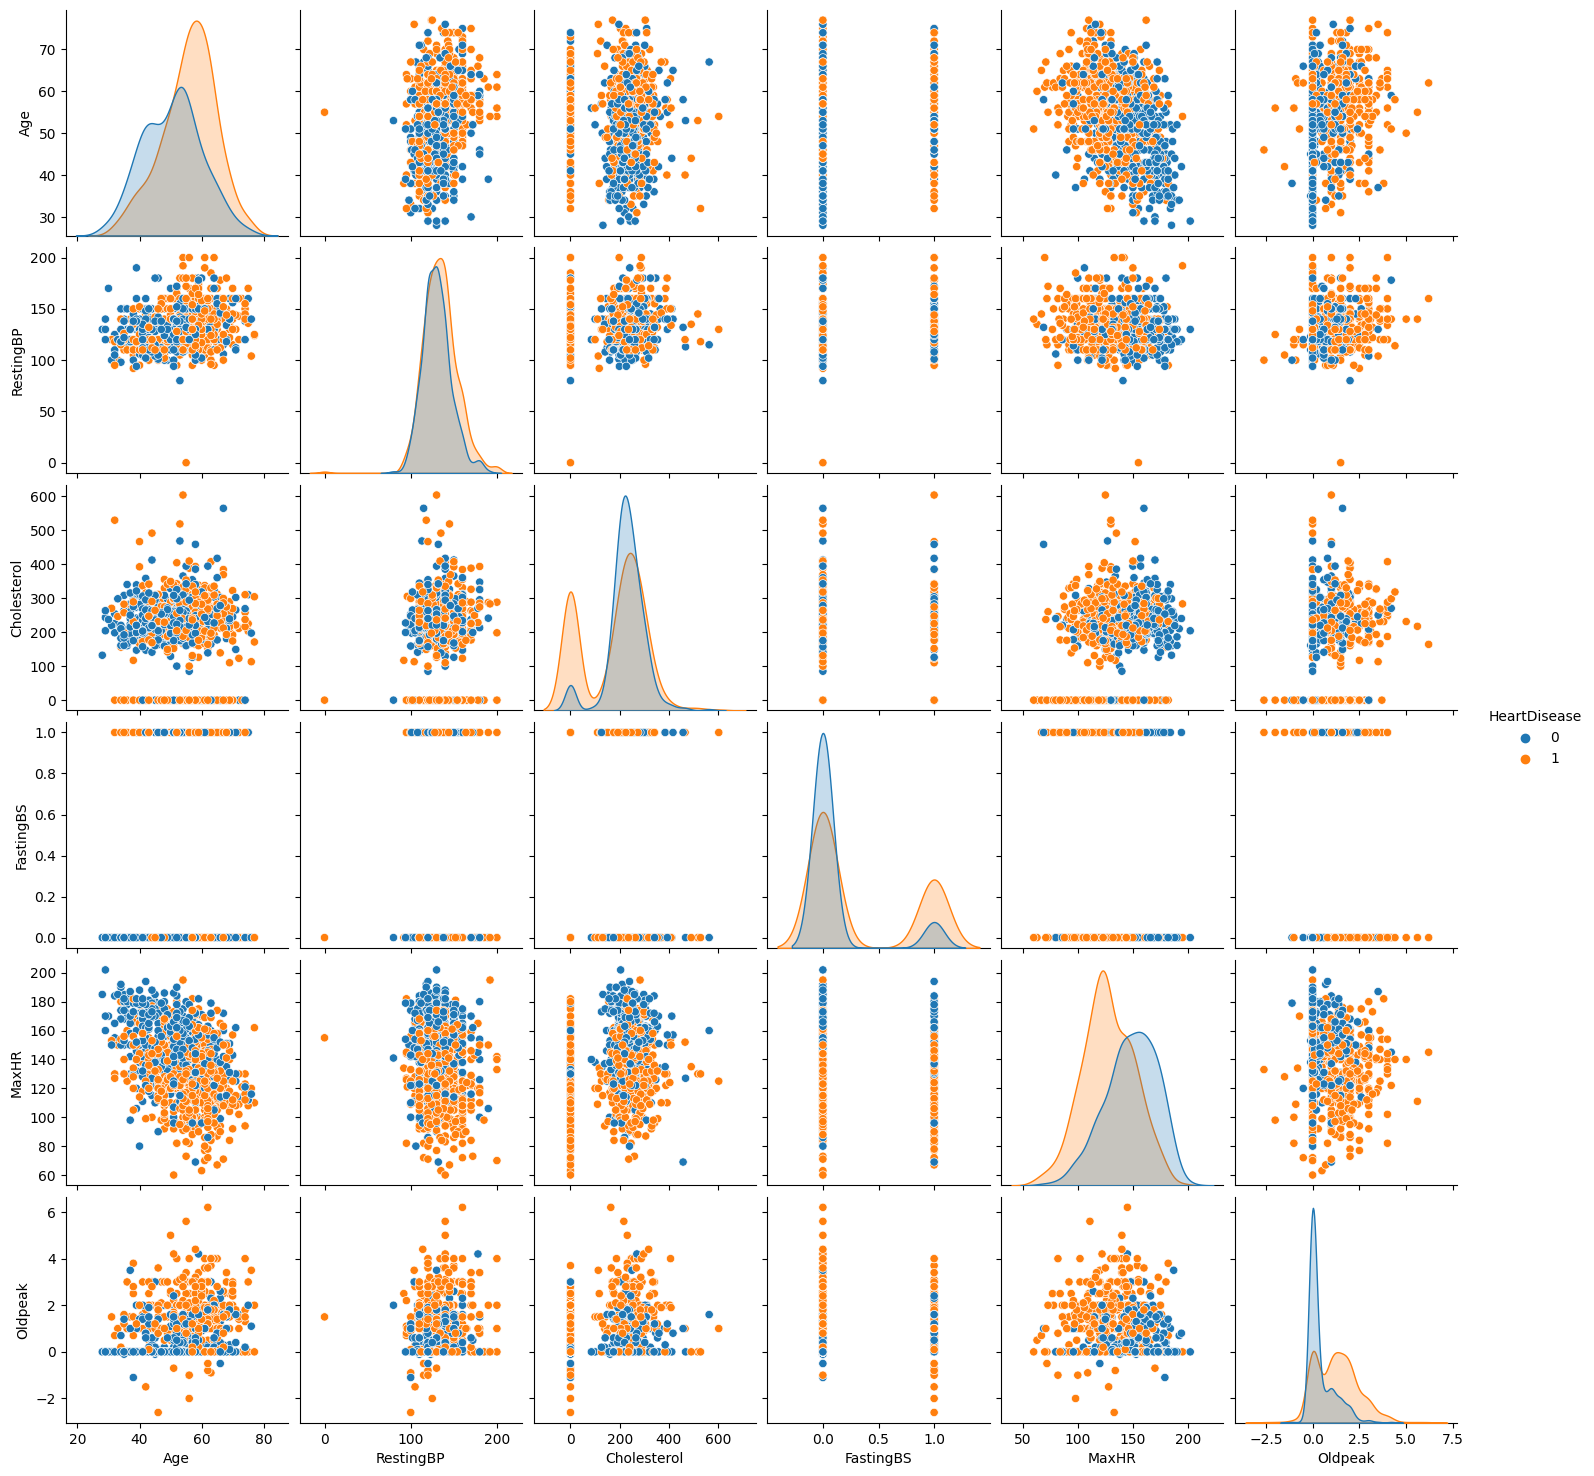

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


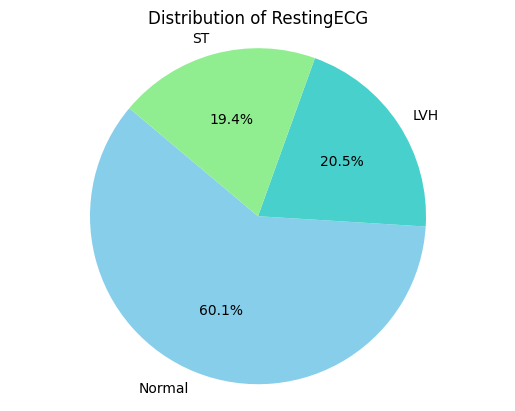


 DATA ENCODING
          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   -1.076923   M           ATA        0.5     0.704000          0     Normal   
1   -0.384615   F           NAP        1.5    -0.458667          0     Normal   
2   -1.307692   M           ATA        0.0     0.640000          0         ST   
3   -0.461538   F           ASY        0.4    -0.096000          0     Normal   
4    0.000000   M           NAP        1.0    -0.298667          0     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.692308   M            TA       -1.0     0.437333          0     Normal   
914  1.076923   M           ASY        0.7    -0.320000          1     Normal   
915  0.230769   M           ASY        0.0    -0.981333          0     Normal   
916  0.230769   F           ATA        0.0     0.138667          0        LVH   
917 -1.230769   M           NAP        0.4    -0.512000          0     Normal   

        Max

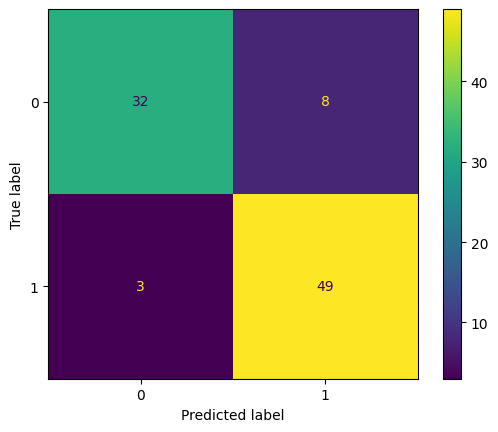

Accuracy Score =  0.8804347826086957
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        40
           1       0.86      0.94      0.90        52

    accuracy                           0.88        92
   macro avg       0.89      0.87      0.88        92
weighted avg       0.88      0.88      0.88        92

New instance description to be predicted: 
Enter age: 50
Sex (Male or Female): Male
Chest Pain Type (1, 2, 3, or 4): 3
Resting Blood Pressure: 150
Cholesterol: 280
Fasting Blood Sugar (0 or 1): 1
Resting ECG (0, 1, or 2): 2
Max Heart Rate: 170
Exercise Induced Angina (0 or 1): 1
Oldpeak: 1
ST Slope (0, 1, or 2): 2

 Structured new instance description:  [50, 'Male', 3, 150, 280, 1, 2, 170, 1, 1.0, 2]

 Predicted instance type: =  Yes

Do you want to predict another instance? (yes/no): yes
New instance description to be predicted: 
Enter age: 70
Sex (Male or Female): Female
Chest Pain Type (1, 2, 3, or 4): 1
Resting Blood Pressur

In [1]:
"""
Created on Sun Feb 25, 2024
@author: Mohammed Abdulai
Random Forest Classifier Assignment - Heart Disease predictor
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

label_encoder = LabelEncoder()
class RForest_model:
    def load_Data(self, filepath):
        df = pd.read_csv(filepath)

        self.df = df

        print(df.head())

        print(df.shape)

    def visualizeData_bef_modeling(self):
        print('\n Visualize Data Patterns Before Modeling')
        df = self.df
 
        plt.figure(figsize=(8, 6))
        sns.lineplot(x=df['Age'], y=df['HeartDisease'], data=df, linewidth=2)
        plt.title('Heart Disease for Ages', fontsize=16)
        plt.xlabel('Age')
        plt.ylabel('Heart Disease')
        plt.gca().set_facecolor('black')
        plt.show()

        #add a pairplot
        sns.pairplot(df, hue='HeartDisease')
        plt.show()

        resting_ecg_counts = df['RestingECG'].value_counts()
        print(resting_ecg_counts)
        colors =colors = ['skyblue', 'mediumturquoise', 'lightgreen']  
        fig = plt.pie(x=resting_ecg_counts.values, 
                    labels=resting_ecg_counts.index,
                    colors=colors,
                    autopct='%1.1f%%',
                    startangle=140) 

        plt.title('Distribution of RestingECG')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

    def data_preprocessing(self):
        df = self.df
          # Winsorization to handle outliers
        winsorized_df = df.copy()
        numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        for feature in numerical_features:
            winsorized_df[feature] = mstats.winsorize(df[feature], limits=[0.05, 0.05])
        
        # Robust scaling to handle outliers
        scaler = RobustScaler()
        winsorized_df[numerical_features] = scaler.fit_transform(winsorized_df[numerical_features])

        df = winsorized_df

        print('\n DATA ENCODING')
        df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
        df['ChestPainType_encoded'] = label_encoder.fit_transform(df['ChestPainType'])
        df['RestingECG_encoded'] = label_encoder.fit_transform(df['RestingECG'])
        df['ST_Slope_encoded'] = label_encoder.fit_transform(df['ST_Slope'])
        df['ExerciseAngina_encoded'] = label_encoder.fit_transform(df['ExerciseAngina'])

        features = df[['Age', 'Sex_encoded', 'ChestPainType_encoded', 'RestingBP', 'Cholesterol',
                       'FastingBS', 'RestingECG_encoded', 'MaxHR', 'ExerciseAngina_encoded', 'Oldpeak', 'ST_Slope_encoded']]
        label = df['HeartDisease']
        print(df)

        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.10, random_state=0)
        print(X_train.shape, ': Training data size')
        print(X_test.shape, ': Test data size')

        self.df = df
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def train_RF_predict_test(self):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test

        RFclass = RandomForestClassifier(n_estimators=20, bootstrap=True, criterion='entropy', random_state=0, n_jobs=-1)
        RFclass.fit(X_train, y_train)

        self.pred_y = RFclass.predict(X_test)
        self.RFclass = RFclass

    def evaluate_RFmodel(self):
        print('\n RANDOM FOREST PERFORMANCE EVALUATIONS')

        RFclass = self.RFclass

        cm = confusion_matrix(self.y_test, self.pred_y, labels=RFclass.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFclass.classes_)
        disp.plot()
        plt.show()

        print("Accuracy Score = ", accuracy_score(self.y_test, self.pred_y))

        print(classification_report(self.y_test, self.pred_y))

    def predict_new_instance(self, new_instance):
        Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope = new_instance

        Sex_encoded = label_encoder.fit_transform([Sex])[0] 
        ChestPainType_encoded = label_encoder.fit_transform(['ChestPainType'])[0]
        RestingECG_encoded = label_encoder.fit_transform(['RestingECG'])[0]
        ExerciseAngina_encoded = label_encoder.fit_transform(['ExerciseAngina'])[0]
        ST_Slope_encoded = label_encoder.fit_transform(['ST_Slope'])[0]

        encoded_instance = [[Age, Sex_encoded, ChestPainType_encoded, RestingBP, Cholesterol,
                             FastingBS, RestingECG_encoded, MaxHR, ExerciseAngina_encoded, Oldpeak, ST_Slope_encoded]]
        pred_instance_encoded = self.RFclass.predict(encoded_instance)
        pred_instance_type = 'Yes' if pred_instance_encoded[0] == 1 else 'No'
        print('\n Predicted instance type: = ', pred_instance_type)


# --------------------------class driver--------------------------------------------------------
handle = RForest_model()

filepath = 'heart.csv'

handle.load_Data(filepath)

handle.visualizeData_bef_modeling()

handle.data_preprocessing()

handle.train_RF_predict_test()

handle.evaluate_RFmodel()

while True:
    print("New instance description to be predicted: ")
    Age = int(input("Enter age: ")) 
    Sex = input("Sex (Male or Female): ")
    ChestPainType = int(input("Chest Pain Type (1, 2, 3, or 4): "))
    RestingBP = int(input("Resting Blood Pressure: "))
    Cholesterol = int(input("Cholesterol: "))
    FastingBS = int(input("Fasting Blood Sugar (0 or 1): "))
    RestingECG = int(input("Resting ECG (0, 1, or 2): "))
    MaxHR = int(input("Max Heart Rate: "))
    ExerciseAngina = int(input("Exercise Induced Angina (0 or 1): "))
    Oldpeak = float(input("Oldpeak: "))
    ST_Slope = int(input("ST Slope (0, 1, or 2): "))

    new_instance = [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]
    print('\n Structured new instance description: ', new_instance)
    handle.predict_new_instance(new_instance)
    user_input = input("\nDo you want to predict another instance? (yes/no): ").lower()
    if user_input != 'yes':
        break
